# 2. DATA ANALYSIS
---


## 2.1. Data cleaning

In [45]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

total_data = pd.read_csv(r'..\data\raw\total_sales.csv')
total_data.head()

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633


There is a daily record always at the same time, therefore, there is no need to clean the date.

In [46]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    366 non-null    object 
 1   sales   366 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


The dataset has 366 rows and 2 columns.

Drop duplicates:

In [47]:
total_data = total_data.drop_duplicates().reset_index(drop = True)
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    366 non-null    object 
 1   sales   366 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


There are no duplicate entries.

## 2.2. Data analysis

In [48]:
# CHANGING 'date' TO DATETIME
total_data['date'] = pd.to_datetime(total_data.date)
total_data = total_data.set_index("date")
# CREATING A NEW VARIABLE FOR ISOLATED ANALYSIS
ts_total = total_data["sales"]
ts_total.head()

date
2022-09-03 17:10:08.079328    55.292157
2022-09-04 17:10:08.079328    53.803211
2022-09-05 17:10:08.079328    58.141693
2022-09-06 17:10:08.079328    64.530899
2022-09-07 17:10:08.079328    66.013633
Name: sales, dtype: float64

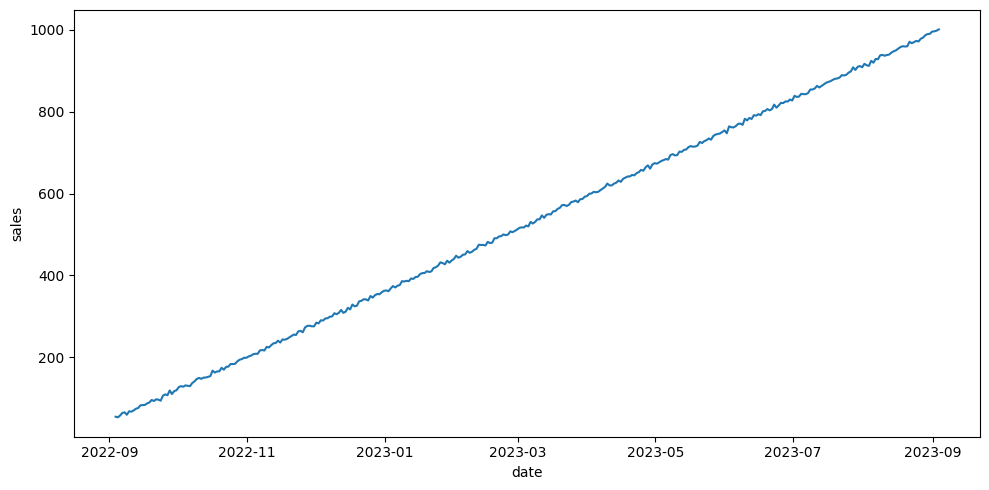

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(figsize = (10, 5))
sns.lineplot(data = ts_total)
plt.tight_layout()
plt.show()

It is possible to see that there is a positive tendency of sales in the graph. Moreover, it has no stationality.

In [50]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_total, period = 12)
decomposition

### first graph: Trend analysis

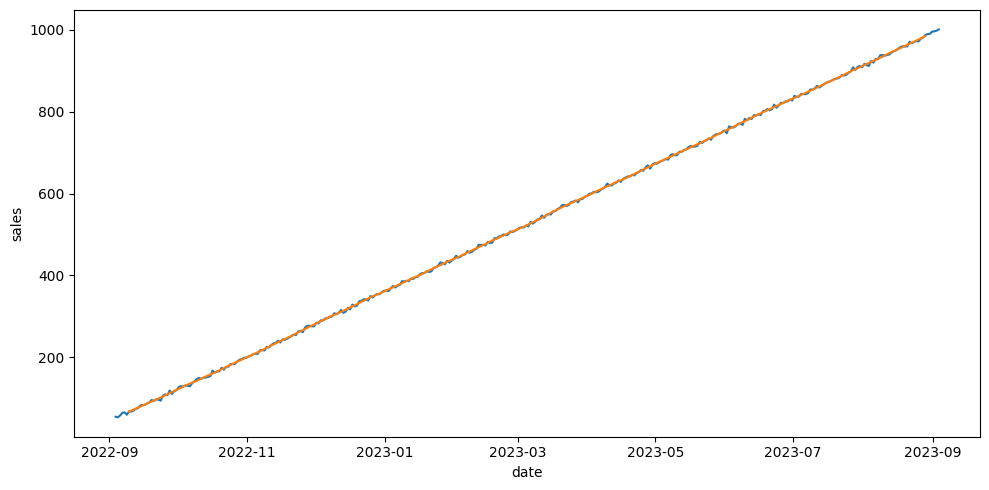

In [51]:
trend = decomposition.trend

fig, axis = plt.subplots(figsize = (10, 5))
sns.lineplot(data = ts_total)
sns.lineplot(data = trend)
plt.tight_layout()
plt.show()

Conclusions: The trend is almost equal to the normal sales. Due to this, is possible to say that the dataset provided has already trended data.

### Second graph: Seasonality analysis

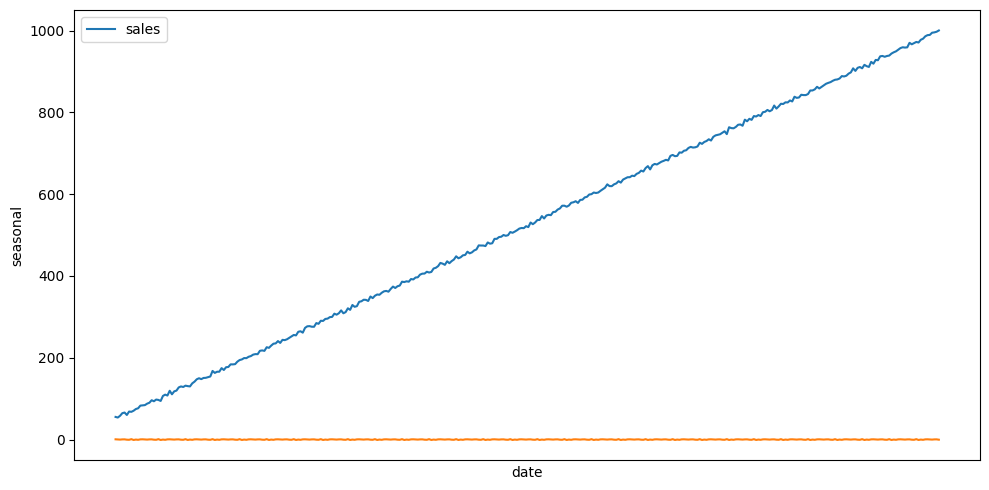

In [52]:
seasonal = decomposition.seasonal

fig, axis = plt.subplots(figsize = (10, 5))
sns.lineplot(data = total_data)
sns.lineplot(data = seasonal)
plt.xticks([])
plt.tight_layout()
plt.show()

In [53]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    print("Dickey-Fuller test results:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(total_data)

Dickey-Fuller test results:


Test Statistic                   0.545414
p-value                          0.986190
#Lags Used                      13.000000
Number of Observations Used    352.000000
Critical Value (1%)             -3.449065
Critical Value (5%)             -2.869786
Critical Value (10%)            -2.571163
dtype: float64

A p-value less than a chosen significance level (commonly 0.05) indicates that you can reject the null hypothesis. In this case, the p-value is quite high (0.986190), which suggests that you accept the alternative hypothesis, that the series is non-stationary.

### Third graph: Analysis of variability

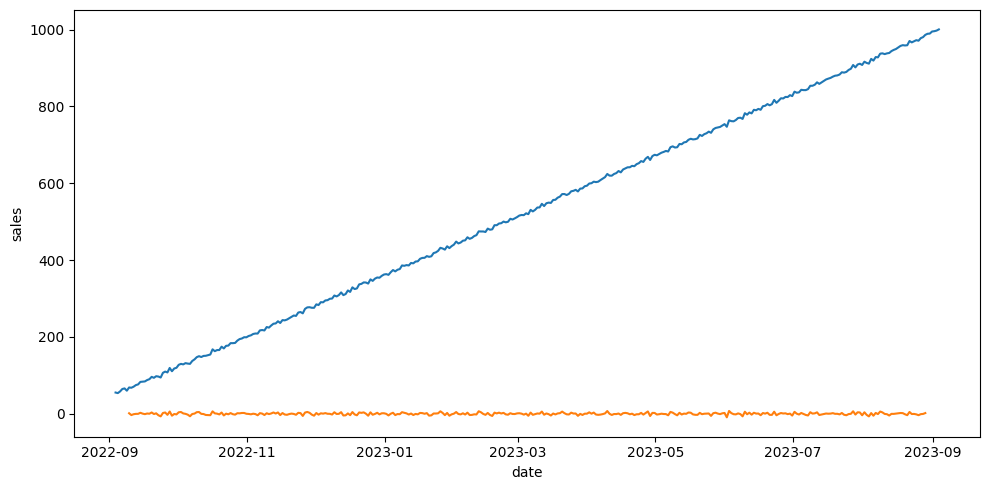

In [54]:
residual = decomposition.resid

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts_total)
sns.lineplot(data = residual)
plt.tight_layout()
plt.show()

This graph shows that the residual data is almost 0 in all the time series.

### Fourth graph: Autocorrelation analysis

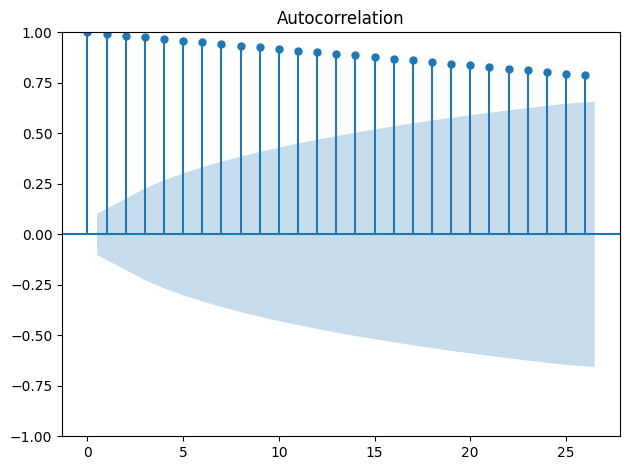

In [55]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(total_data)
plt.tight_layout()
plt.show()

This graph shows that the correlation between the data and the older data is high (almost 1.0) and it has a small decrease over time.

Split and save the data

In [65]:
# SPLIT THE DATA INTO TRAIN AND TEST
from sklearn.model_selection import train_test_split
X = total_data
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# SAVE THE DATA IN /PROCESSED
X_train.to_csv(r'../data/processed/train_data.csv',index=False)
X_test.to_csv(r'../data/processed/test_data.csv',index=False)
total_data.to_csv(r'../data/processed/total_sales.csv',index=False)

____

# GENERAL CONCLUSIONS

Questions to answer:
- Which is the tensor of the time serie? **The tensor of the time series is a day**
- Which is the trend? **The trend of the time series is a possitive one**
- Is it stationary? **No, the time series is non-stationary**
- Is there variability or noise? **There is almost no variability or noise in the time series**